In [1]:
import numpy as np
from igraph import *

def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = matrix.shape[0]

    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i] == 1:
                res[start].append(i)
        start += 1
    return res

# Problem I

Generate graph

In [2]:
g = Graph()
g.add_vertices(100)
edges = [(i, j) for i, j in zip(np.random.randint(0, 99, 200), np.random.randint(0, 99, 200))]
g.add_edges(edges)

adjacency_matrix = g.get_adjacency() # adjacency matrix
adjacency_list = convert_to_adjacency(adjacency_matrix) # adjacency list

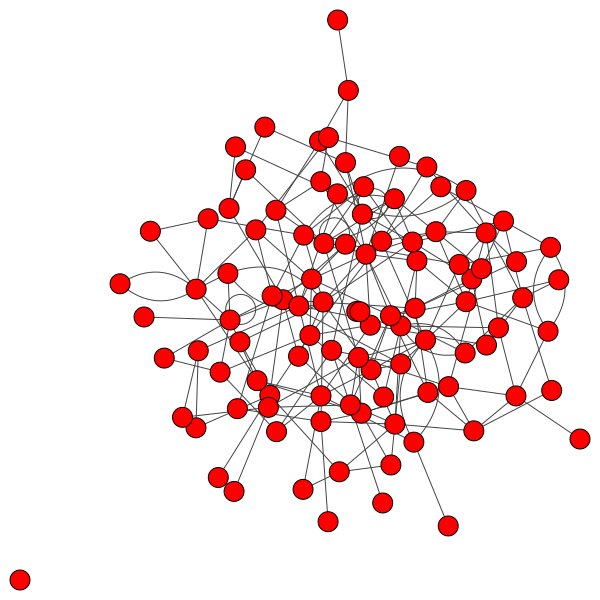

In [3]:
layout = g.layout("kk")
plot(g, layout=layout)

In [4]:
print('adjacency_matrix : \n\n', adjacency_matrix[4:6])
print('adjacency_list : \n\n', adjacency_list[4:6])

adjacency_matrix : 

 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
adjacency_list : 

 [[18, 21, 29, 36, 56, 97], [42, 75, 83]]


def dfs(adj_list, start, target, path, visited = set()):
    path.append(start)
    visited.add(start)
    if start == target:
        return path
    for neighbour in adj_list[start]:
        if neighbour not in visited:
            result = dfs(adj_list, neighbour, target, path, visited)
            if result is not None:
                return result
	  path.pop()
    return None
# Problem II

In [5]:
adjacency_dict = {key : adjacency_list[key] for key in range(100)}

In [6]:
def dfs(adjacencyList, vertex, search = None, visitedSet = None, path = None): 
    # create memo once in top-level call
    if visitedSet is None:
        visitedSet = set()
    if path is None:
        path = []
        
    visitedSet.add(vertex)
    path.append(vertex)        
        
    if vertex in adjacencyList and search not in visitedSet:
        for neighbor in adjacencyList[vertex]:
            if neighbor not in visitedSet and search not in visitedSet:
                dfs(adjacencyList, neighbor, search, visitedSet, path)
    return path


def bfs(visited, graph, node, search = None):
    visited.append(node)
    queue.append(node)

    while queue:        
        s = queue.pop(0) 
        
        for neighbour in graph[s]:
            if neighbour not in visited and search not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return visited

In [7]:
print(dfs(adjacency_dict, 2,))

[2, 93, 14, 39, 9, 26, 12, 62, 3, 15, 32, 38, 48, 85, 36, 4, 18, 19, 50, 23, 0, 56, 17, 37, 33, 30, 53, 6, 60, 47, 72, 7, 57, 45, 67, 28, 20, 52, 84, 27, 10, 54, 31, 16, 25, 91, 55, 13, 8, 89, 11, 82, 90, 22, 75, 5, 42, 43, 1, 73, 41, 94, 87, 46, 76, 49, 95, 83, 71, 21, 88, 98, 61, 58, 63, 68, 69, 79, 65, 24, 80, 35, 74, 51, 59, 29, 40, 66, 92, 34, 86, 64, 44, 97, 70, 96]


In [12]:
print(dfs(adjacency_dict, 2, 6))

[2, 93, 14, 39, 9, 26, 12, 62, 3, 15, 32, 38, 48, 85, 36, 4, 18, 19, 50, 23, 0, 56, 17, 37, 33, 30, 53, 6]


In [13]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

print(bfs(visited, adjacency_dict, 2))

[2, 93, 14, 28, 36, 39, 41, 58, 92, 20, 52, 67, 84, 4, 75, 85, 88, 94, 9, 56, 3, 50, 73, 61, 63, 68, 79, 15, 60, 91, 27, 37, 18, 21, 29, 97, 5, 10, 22, 51, 44, 48, 70, 71, 87, 26, 0, 17, 53, 23, 47, 62, 65, 80, 96, 19, 64, 72, 1, 13, 33, 30, 38, 98, 31, 69, 32, 6, 25, 55, 16, 59, 34, 40, 42, 83, 54, 90, 46, 12, 7, 82, 57, 76, 24, 43, 8, 74, 95, 49, 89, 66, 86, 35, 45, 11]


In [14]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

print(bfs(visited, adjacency_dict, 2, 6))

[2, 93, 14, 28, 36, 39, 41, 58, 92, 20, 52, 67, 84, 4, 75, 85, 88, 94, 9, 56, 3, 50, 73, 61, 63, 68, 79, 15, 60, 91, 27, 37, 18, 21, 29, 97, 5, 10, 22, 51, 44, 48, 70, 71, 87, 26, 0, 17, 53, 23, 47, 62, 65, 80, 96, 19, 64, 72, 1, 13, 33, 30, 38, 98, 31, 69, 32, 6]
